In [9]:
import numpy as np

def criaDatasetBidimensionalBinário(n=20):
    """
    Cria um dataset bidimensional binário com
    rótulos igual 1 para todo exemplo que tiver
    o valor da primeira característica maior do
    que a da segunda, e -1 para os demais.
    """
    X = np.random.uniform(size=(n,2))
    y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
    return X, y

Xtr, ytr = criaDatasetBidimensionalBinário()
Xtr, ytr

(array([[0.17966598, 0.12942593],
        [0.81560388, 0.5381969 ],
        [0.91615856, 0.84401782],
        [0.56261396, 0.33228578],
        [0.5897019 , 0.85908818],
        [0.81257349, 0.15638925],
        [0.70110953, 0.6919474 ],
        [0.28757226, 0.83420043],
        [0.94035187, 0.98360914],
        [0.76647703, 0.35676172],
        [0.95035046, 0.163507  ],
        [0.0726001 , 0.93448098],
        [0.31096062, 0.09733582],
        [0.38044542, 0.80801454],
        [0.87019991, 0.80550339],
        [0.81001592, 0.13746042],
        [0.51364051, 0.58575828],
        [0.20041217, 0.34601829],
        [0.96597828, 0.67048659],
        [0.06425105, 0.67435638]]),
 array([ 1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,
        -1,  1, -1]))

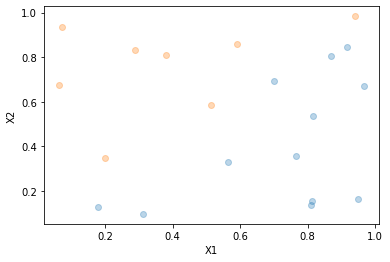

In [10]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

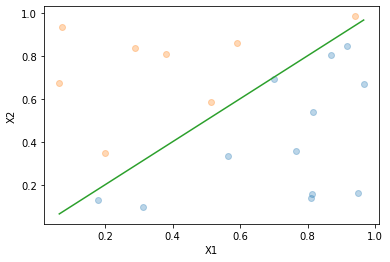

In [11]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plotaDatasetBidimensional(X, y)
    plt.plot(xs,ys)

plotaHiperplanoDatasetBidimensional(Xtr, ytr, [1,-1])

In [12]:
def sign(a):
    return (a >= 0) * 2 - 1


In [13]:
def accuracy(yactual, ypred):
    return sum(yactual == ypred)/len(yactual)

1.0
[ 21.43949629 -20.5060055 ]


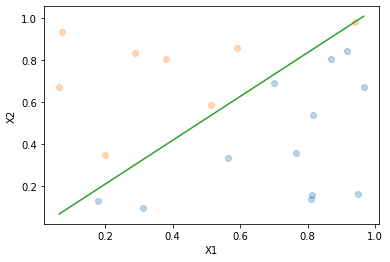

In [14]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão do Perceptron com limite de iterações,
    treinado em batch.
    """
    def __init__(self, max_iter=100):
        self.w = None
        self.activation = sign
        self.max_iter = max_iter

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=X.shape[1])
        for _ in range(self.max_iter):
            ypred = self.predict(X)
            erros = y - ypred
            custo = sum(erros**2)
            if custo == 0:
                break
            self.w += np.matmul(X.T, erros)

    def predict(self, X):
        a = np.matmul(X, self.w)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w)

In [15]:
Xte, yte = criaDatasetBidimensionalBinário(1000)

0.973


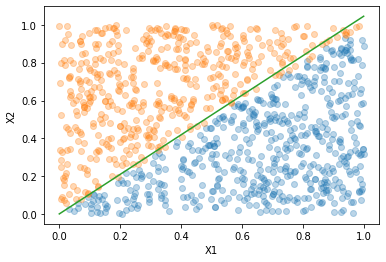

In [16]:
print(accuracy(yte, perceptron.predict(Xte)))
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w)